<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/chpt10_Sampling_and_Empirical_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# 10. Sampling and Empirical Distributions
An important part of data science consists of making conclusions based on the data in random samples. In order to correctly interpret their results, data scientists have to first understand exactly what random samples are.

In this chapter we will take a more careful look at sampling, with special attention to the properties of large random samples. 

Let's start by drawing some samples. Our examples are based on the [`top_movies_2017.csv`](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html#grouping-categorical-data) data set.

In [ ]:
top1 = Table.read_table(path_data + 'top_movies_2017.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


<h2>Sampling Rows of a Table</h2>

Each row of a data table represents an individual; in `top`, each individual is a movie. Sampling individuals can thus be achieved by sampling the rows of a table.

The contents of a row are the values of different variables measured on the same individual. So the contents of the sampled rows form samples of values of each of the variables.

<h2>Deterministic Samples</h2>

When you simply specify which elements of a set you want to choose, without any chances involved, you create a *deterministic sample*.

You have done this many times, for example by using `take`:

In [ ]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
18,The Lion King,Buena Vista,"422,783,777","792,511,700",1994
100,The Hunger Games,Lionsgate,"408,010,692","452,174,400",2012


You have also used `where`:

In [ ]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,"290,013,036","401,608,200",2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,"261,988,482","399,302,200",2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,"292,004,738","377,314,200",2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,"301,959,197","359,788,300",2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,"249,541,069","357,233,500",2004


While these are samples, they are not random samples. They don't involve chance.

<h2>Probability Samples</h2>

For describing random samples, some terminology will be helpful.

A *population* is the set of all elements from whom a sample will be drawn.

A *probability sample* is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample.

In a probability sample, all elements need not have the same chance of being chosen. 

<h2>A Random Sampling Scheme</h2>

For example, suppose you choose two people from a population that consists of three people A, B, and C, according to the following scheme:

- Person A is chosen with probability 1.
- One of Persons B or C is chosen according to the toss of a coin: if the coin lands heads, you choose B, and if it lands tails you choose C.

This is a probability sample of size 2. Here are the chances of entry for all non-empty subsets:

    A: 1 
    B: 1/2
    C: 1/2
    AB: 1/2
    AC: 1/2
    BC: 0
    ABC: 0

Person A has a higher chance of being selected than Persons B or C; indeed, Person A is certain to be selected. Since these differences are known and quantified, they can be taken into account when working with the sample. 

<h2>A Systematic Sample</h2>

Imagine all the elements of the population listed in a sequence. One method of sampling starts by choosing a random position early in the list, and then evenly spaced positions after that. The sample consists of the elements in those positions. Such a sample is called a *systematic sample*. 

Here we will choose a systematic sample of the rows of `top`. We will start by picking one of the first 10 rows at random, and then we will pick every 10th row after that.

In [ ]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
11,101 Dalmatians,Disney,"144,880,014","888,264,400",1961
21,The Graduate,AVCO,"104,945,305","760,778,000",1967
31,The Jungle Book,Disney,"141,843,612","655,014,400",1967
41,Cleopatra (1963),Fox,"57,777,778","597,261,000",1963
51,Batman,Warner Brothers,"251,188,924","559,666,600",1989
61,National Lampoon's Animal House,Universal,"141,600,000","532,424,500",1978
71,Beauty and the Beast (2017),Buena Vista,"504,014,165","504,014,165",2017
81,The Poseidon Adventure,Fox,"84,563,118","488,078,400",1972
91,Indiana Jones and the Temple of Doom,Paramount,"179,870,271","475,906,700",1984


Run the cell a few times to see how the output varies. 

This systematic sample is a probability sample. In this scheme, all rows have chance $1/10$ of being chosen. For example, Row 23 is chosen if and only if Row 3 is chosen, and the chance of that is $1/10$. 

But not all subsets have the same chance of being chosen. Because the selected rows are evenly spaced, most subsets of rows have no chance of being chosen. The only subsets that are possible are those that consist of rows all separated by multiples of 10. Any of those subsets is selected with chance 1/10.  Other subsets, such as a subset containing both the 15th and 16th rows of the table, or any subset of size more than 10, are selected with chance 0.

**Notice that on this systematic sample, each row has the same probability of being selected BUT  not every subset of rows has the same probability of being selected.**

<h2>Random Samples Drawn With or Without Replacement</h2>
 
In this course, we will mostly deal with the two most straightforward methods of sampling. 

The first is random sampling with replacement, which (as we have seen earlier) is the default behavior of `np.random.choice` when it samples from an array. 

The other, called a "simple random sample", is a sample drawn at random *without* replacement. Sampled individuals are not replaced in the population before the next individual is drawn. This is the kind of sampling that happens when you deal a hand from a deck of cards, for example. To use `np.random.choice` for simple random sampling, you must include the argument `replace=False`.

In this chapter, we will use simulation to study the behavior of large samples drawn at random with or without replacement.

<h2>Convenience Samples</h2>
Drawing a random sample requires care and precision. It is not haphazard even though that is a colloquial meaning of the word "random". If you stand at a street corner and take as your sample the first ten people who pass by, you might think you're sampling at random because you didn't choose who walked by. But it's not a random sample – it's a *sample of convenience*. You didn't know ahead of time the probability of each person entering the sample; perhaps you hadn't even specified exactly who was in the population.

## 10.1. Empirical Distributions

In data science, the word "empirical" means "observed". Empirical distributions are distributions of observed data, such as data in random samples.

In this section we will generate data and see what the empirical distribution looks like. 

Our setting is a simple experiment: rolling a die multiple times and keeping track of which face appears. The table `die` contains the numbers of spots on the faces of a die. All the numbers appear exactly once, as we are assuming that the die is fair.

In [ ]:
from datascience import *
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [ ]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


### 10.1.1. A Probability Distribution

The histogram below helps us visualize the fact that every face appears with probability 1/6. We say that the histogram shows the *distribution* of probabilities over all the possible faces. Since all the bars represent the same percent chance, the distribution is called *uniform on the integers 1 through 6.*

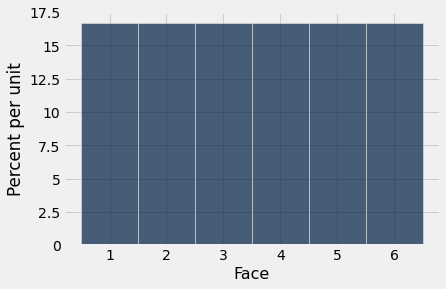

In [ ]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

Variables whose successive values are separated by the same fixed amount, such as the values on rolls of a die (successive values separated by 1), fall into a class of variables that are called *discrete*. The histogram above is called a *discrete* histogram. Its bins are specified by the array `die_bins` and ensure that each bar is centered over the corresponding integer value. 

It is important to remember that the die can't show 1.3 spots, or 5.2 spots – it always shows an integer number of spots. But our visualization spreads the probability of each value over the area of a bar. While this might seem a bit arbitrary at this stage of the course, it will become important later when we overlay smooth curves over discrete histograms.

Before going further, let's make sure that the numbers on the axes make sense. The probability of each face is 1/6, which is 16.67% when rounded to two decimal places. The width of each bin is 1 unit. So the height of each bar is 16.67% per unit. This agrees with the horizontal and vertical scales of the graph.

### 10.1.2. Empirical Distributions
The distribution above consists of the theoretical probability of each face. It is called a *probability distribution* and is not based on observed data. It can be studied and understood without any dice being rolled.

*Empirical distributions,* on the other hand, are distributions of observed data. They can be visualized by *empirical histograms*. 

Let us get some data by simulating rolls of a die. This can be done by sampling at random with replacement from the integers 1 through 6. We have used `np.random.choice` for such simulations before. But now we will introduce a Table method for doing this. This will make it easier for us to use our familiar Table methods for visualization.

The Table method is called `sample`. It draws at random with replacement from the rows of a table. Its argument is the sample size, and it returns a table consisting of the rows that were selected. An optional argument `with_replacement=False` specifies that the sample should be drawn without replacement. But that does not apply to rolling a die.

Here are the results of 10 rolls of a die.

In [ ]:
die.sample(10)

Face
6
5
3
3
4
4
4
5
3
3


We can use the same method to simulate as many rolls as we like, and then draw empirical histograms of the results. Because we are going to do this repeatedly, we define a function `empirical_hist_die` that takes the sample size as its argument, rolls a die as many times as the argument, and then draws a histogram of the observed results.

In [ ]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

### 10.1.3. Empirical Histograms

Here is an empirical histogram of 10 rolls. It doesn't look very much like the probability histogram above. Run the cell a few times to see how it varies.

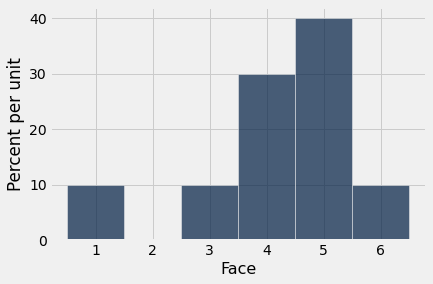

In [ ]:
empirical_hist_die(10)

When the sample size increases, the empirical histogram begins to look more like the histogram of theoretical probabilities.

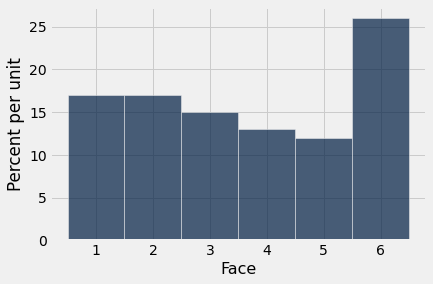

In [ ]:
empirical_hist_die(100)

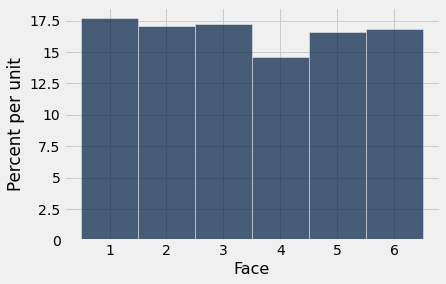

In [ ]:
empirical_hist_die(1000)

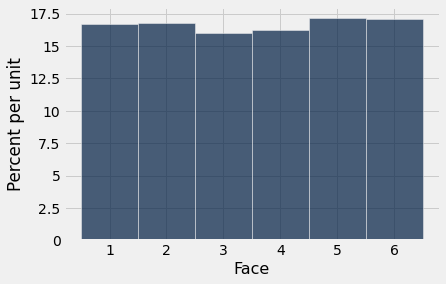

In [ ]:
empirical_hist_die(10000)

As we increase the number of rolls in the simulation, the area of each bar gets closer to 16.67%, which is the area of each bar in the probability histogram.

### 10.1.4. The Law of Averages

What we have observed above is an instance of a general rule called the *law of averages*:

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appears gets closer and closer to 1/6.

Here "independently and under identical conditions" means that every repetition is performed in the same way regardless of the results of all the other repetitions.

Under these conditions, the law above implies that if the chance experiment is repeated a large number of times then the proportion of times that an event occurs is very likely to be close to the theoretical probability of the event.

## 10.2. Sampling from a Population

The law of averages also holds when the random sample is drawn from individuals in a large population.

As an example, we will study a population of flight delay times. The table `united` contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the [Bureau of Transportation Statistics](http://www.transtats.bts.gov/Fields.asp?Table_ID=293) in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative: those flights left early.

In [ ]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


One flight departed 16 minutes early, and one was 580 minutes late. The other delay times were almost all between -10 minutes and 200 minutes, as the histogram below shows.

In [ ]:
united.column('Delay')

array([257,  28,  -3, ...,   3,  -1,  -2])

In [ ]:
united.column('Delay').min()

-16

In [ ]:
united.column('Delay').max()

580

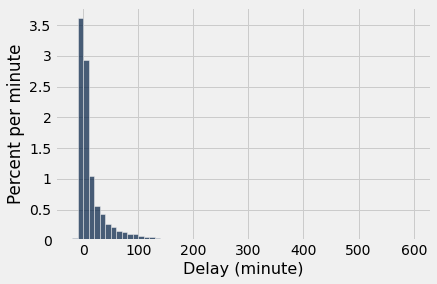

In [ ]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

For the purposes of this section, it is enough to zoom in on the bulk of the data and ignore the 0.8% of flights that had delays of more than 200 minutes. This restriction is just for visual convenience; the table still retains all the data.

In [ ]:
#How many rows in the table there are where the delay is above 200 mins.
#By putting "/united.num_rows" you get the percentage
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

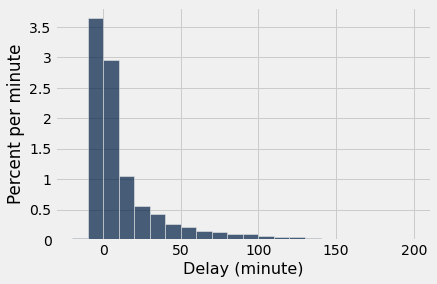

In [ ]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes. That is confirmed by counting rows: 

In [ ]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

### 10.2.1. Empirical Distribution of the Sample

Let us now think of the 13,825 flights as a population, and draw random samples from it with replacement. It is helpful to package our code into a function. The function `empirical_hist_delay` takes the sample size as its argument and draws an empiricial histogram of the results.

In [ ]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

As we saw with the dice, as the sample size increases, the empirical histogram of the sample more closely resembles the histogram of the population. Compare these histograms to the population histogram above.

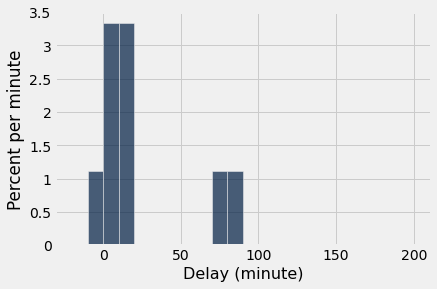

In [ ]:
empirical_hist_delay(10)

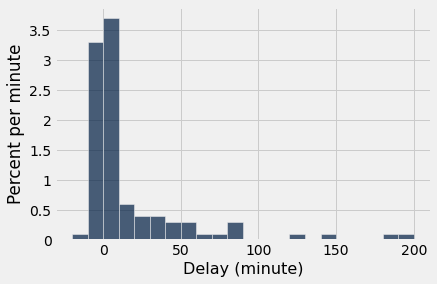

In [ ]:
empirical_hist_delay(100)

The most consistently visible discrepancies are among the values that are rare in the population. In our example, those values are in the the right hand tail of the distribution. But as the sample size increases, even those values begin to appear in the sample in roughly the correct proportions.

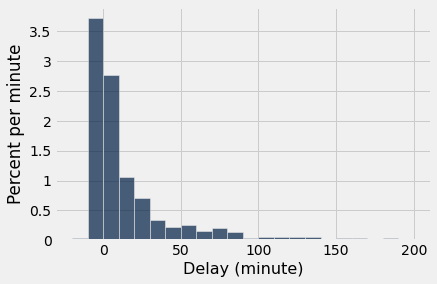

In [ ]:
empirical_hist_delay(1000)

### 10.2.2. Convergence of the Empirical Histogram of the Sample
What we have observed in this section can be summarized as follows:

For a large random sample, the empirical histogram of the sample resembles the histogram of the population, with high probability.

This justifies the use of large random samples in statistical inference. The idea is that since a large random sample is likely to resemble the population from which it is drawn, quantities computed from the values in the sample are likely to be close to the corresponding quantities in the population.

## 10.3. Empirical Distribution of a Statistic
The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

The resemblance is visible in two histograms: the empirical histogram of a large random sample is likely to resemble the histogram of the population.

As a reminder, here is the histogram of the delays of all the flights in `united`, and an empirical histogram of the delays of a random sample of 1,000 of these flights.

In [ ]:
united = Table.read_table(path_data + 'united_summer2015.csv')

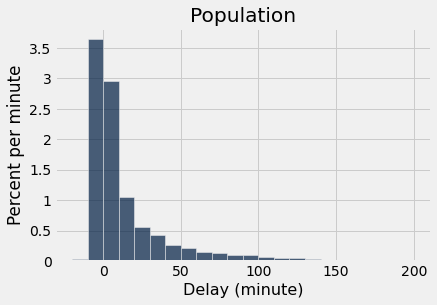

In [ ]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population');

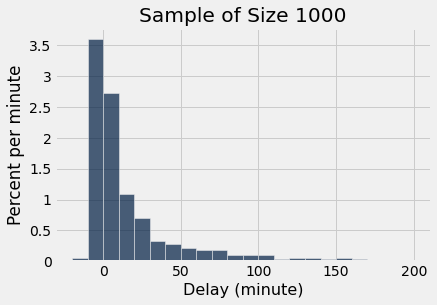

In [ ]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

The two histograms clearly resemble each other, though they are not identical. 

### 10.3.1. Parameter
Frequently, we are interested in numerical quantities associated with a population.
- In a population of voters, what percent will vote for Candidate A?
- In a population of Facebook users, what is the largest number of Facebook friends that the users have?
- In a population of United flights, what is the median departure delay?

Numerical quantities associated with a population are called *parameters*. For the population of flights in `united`, we know the value of the parameter "median delay":

In [ ]:
np.median(united.column('Delay'))

2.0

The `NumPy` function `median` returns the median (half-way point) of an array. Among all the flights in `united`, the median delay was 2 minutes. That is, about 50% of flights in the population had delays of 2 or fewer minutes:

In [ ]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

Half of all flights left no more than 2 minutes after their scheduled departure time. That's a very short delay!  

**Note.** The percent isn't exactly 50 because of "ties," that is, flights that had delays of exactly 2 minutes. There were 480 such flights. Ties are quite common in data sets, and we will not worry about them in this course.

In [ ]:
united.where('Delay', are.equal_to(2)).num_rows

480

### 10.3.2. Statistic
In many situations, we will be interested in figuring out the value of an unknown parameter. For this, we will rely on data from a large random sample drawn from the population.

A *statistic* (note the singular!) is any number computed using the data in a sample. The sample median, therefore, is a statistic. 

Remember that `sample_1000` contains a random sample of 1000 flights from `united`. The observed value of the sample median is:

In [ ]:
np.median(sample_1000.column('Delay'))

3.0

Our sample – one set of 1,000 flights – gave us one observed value of the statistic. This raises an important problem of inference:

**The statistic could have been different.**
A fundamental consideration in using any statistic based on a random sample is that *the sample could have come out differently*, and therefore the statistic could have come out differently too. 

In [ ]:
np.median(united.sample(1000).column('Delay'))

3.0

Run the cell above a few times to see how the answer varies. Often it is equal to 2, the same value as the population parameter. But sometimes it is different.

**Just how different could the statistic have been?** One way to answer this is to simulate the statistic many times and note the values. A histogram of those values will tell us about the distribution of the statistic.

Let's recall the main steps in a simulation.

### 10.3.3. Simulating a Statistic
We will simulate the sample median using the steps we set up in an earlier chapter when we started studying simulation. You can replace the sample size of 1000 by any other sample size, and the sample median by any other statistic.

**Step 1: Decide which statistic to simulate.** We have already decided that: we are going to simulate the median of a random sample of size 1000 drawn from the population of flight delays.

**Step 2: Define a function that returns one simulated value of the statistic.** Draw a random sample of size 1000 and compute the median of the sample. We did this in the code cell above. Here it is again, encapsulated in a function.

In [ ]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

**Step 3: Decide how many simulated values to generate.** Let's do 5,000 repetitions.

**Step 4: Use a `for` loop to generate an array of simulated values.** As usual, we will start by creating an empty array in which to collect our results. We will then set up a `for` loop for generating all the simulated values. The body of the loop will consist of generating one simulated value of the sample median, and appending it to our collection array.

The simulation takes a noticeable amount of time to run. That is because it is performing 5000 repetitions of the process of drawing a sample of size 1000 and computing its median. That's a lot of sampling and repeating!

In [ ]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

The simulation is done. All 5,000 simulated sample medians have been collected in the array `medians`. Now it's time to visualize the results. 

### 10.3.4. Visualization

Here are the simulated random sample medians displayed in the table `simulated_medians`.

In [ ]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
2
2
2
2
3
2
2
3
2


We can also visualize the simulated data using a histogram. The histogram is called an *empirical histogram of the statistic*. It displays the *empirical distribution* of the statistic. Remember that *empirical* means *observed*.

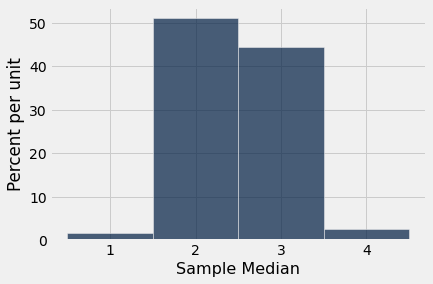

In [ ]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))

You can see that the sample median is very likely to be about 2, which was the value of the population median. Since samples of 1000 flight delays are likely to resemble the population of delays, it is not surprising that the median delays of those samples should be close to the median delay in the population.

This is an example of how a statistic can provide a good estimate of a parameter.

### 10.3.5. The Power of Simulation

If we could generate all possible random samples of size 1000, we would know all possible values of the statistic (the sample median), as well as the probabilities of all those values. We could visualize all the values and probabilities in the probability histogram of the statistic.

But in many situations including this one, the number of all possible samples is large enough to exceed the capacity of the computer, and purely mathematical calculations of the probabilities can be intractably difficult.

This is where empirical histograms come in.

We know that by the Law of Averages, the empirical histogram of the statistic is likely to resemble the probability histogram of the statistic, if the sample size is large and if you repeat the random sampling process numerous times.

This means that simulating random processes repeatedly is a way of approximating probability distributions *without figuring out the probabilities mathematically or generating all possible random samples*. Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.

## 10.4. Random Sampling in Python 

This section summarizes the ways you have learned to sample at random using Python, and introduces a new way.

## Review: Sampling from a Population in a Table 
If you are sampling from a population of individuals whose data are represented in the rows of a table, then you can use the Table method `sample` to [randomly select rows](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#id1) of the table. That is, you can use `sample` to select a random sample of individuals.

By default, `sample` draws uniformly at random with replacement. This is a natural model for chance experiments such as rolling a die.

In [ ]:
faces = np.arange(1, 7)
die = Table().with_columns('Face', faces)
die

Face
1
2
3
4
5
6


Run the cell below to simulate 7 rolls of a die.

In [ ]:
die.sample(7)

Face
1
3
6
5
6
3
5


Sometimes it is more natural to sample individuals at random without replacement. This is called a simple random sample. The argument `with_replacement=False` allows you to do this.

In [ ]:
actors = Table.read_table(path_data + 'actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


In [ ]:
# Simple random sample of 5 rows
actors.sample(5, with_replacement=False)

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Ben Stiller,2827,37,76.4,Meet the Fockers,279.3
Gary Oldman,3294,38,86.7,The Dark Knight,534.9
Owen Wilson,2602.3,39,66.7,Night at the Museum,250.9
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Cameron Diaz,3031.7,34,89.2,Shrek 2,441.2


Since `sample` gives you the entire sample in the order in which the rows were selected, you can use Table methods on the sampled table to answer many questions about the sample. For example, you can find the number of times the die showed six spots, or the average number of movies in which the sampled actors appeared, or whether one two specified actors appeared in the sample. You might need multiple lines of code to get some of this information.

### 10.4.1. Review: Sampling from a Population in an Array 

If you are sampling from a population of individuals whose data are represented as an array, you can use the NumPy function `np.random.choice` to [randomly select elements of the array](https://inferentialthinking.com/chapters/09/3/Simulation.html#example-number-of-heads-in-100-tosses).

By default, `np.random.choice` samples at random with replacement.

In [ ]:
# The faces of a die, as an array
faces

array([1, 2, 3, 4, 5, 6])

In [ ]:
# 7 rolls of the die
np.random.choice(faces, 7)

array([1, 4, 6, 4, 3, 3, 4])

The argument `replace=False` allows you to get a simple random sample, that is, a sample drawn at random without replacement.

In [ ]:
# Array of actor names
actor_names = actors.column('Actor')

In [ ]:
# Simple random sample of 5 actor names
np.random.choice(actor_names, 5, replace=False)

array(['Stellan Skarsgard', 'Idris Elba', 'Elizabeth Banks',
       'Robert DeNiro', 'Scarlett Johansson'], dtype='<U22')

Just as `sample` did, so also `np.random.choice` gives you the entire sequence of sampled elements. You can use array operations to answer many questions about the sample. For example, you can find which actor was the second one to be drawn, or the number of faces of the die that appeared more than once. Some answers might need multiple lines of code.

### 10.4.2. Sampling from a Categorical Distribution 
Sometimes we are interested in a categorical attribute of our sampled individuals. For example, we might be looking at whether a coin lands Heads or Tails. Or we might be interested in the political parties of randomly selected voters.

In such cases, we frequently need the proportions of sampled voters in the different categories. If we have the entire sample, we can calculate these proportions. The function `sample_proportions` in the `datascience` library does that work for us. It is tailored for sampling at random with replacement from a categorical distribution and returns the proportions of sampled elements in each category.

The `sample_proportions` function takes two arguments:
- the sample size
- the distribution of the categories in the population, as a list or array of proportions that add up to 1

It returns an array containing the distribution of the categories in a random sample of the given size taken from the population. That's an array consisting of the sample proportions in all the different categories, in the same order in which they appeared in the population distribution.

For example, suppose each plant of a species is red-flowering with chance 25%, pink-flowering with chance 50%, and white-flowering with chance 25%, regardless of the flower colors of all other plants. You can use `sample_proportions` to see the proportions of the different colors among 300 plants of the species.

In [ ]:
# Species distribution of flower colors:
# Proportions are in the order Red, Pink, White
species_proportions = [0.2, 0.5, 0.3]

sample_size = 300

# Distribution of sample
sample_distribution = sample_proportions(sample_size, species_proportions)
sample_distribution

array([0.21666667, 0.47333333, 0.31      ])

As you expect, the proportions in the sample sum to 1.

In [ ]:
sum(sample_distribution)

1.0

The categories in `species_proportions` are in the order Red, Pink, White. That order is preserved by `sample_proportions`. If you just want the proportion of pink-flowering plants in the sample, you can use `item`:

In [ ]:
# Sample proportion of Heads
sample_distribution.item(1)

0.5033333333333333

You can use `sample_proportions` and array operations to answer questions based only on the proportions of sampled individuals in the different categories. You will not be able to answer questions that require more detailed information about the sample, such as which of the sampled plants had each of the different colors.